# SVM classification with anisotropy factors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
CI02 = utils.load_data("data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("data/for_learning_plus/CI21.npy")

In [3]:
C1_02 = CI02[CI02['Y']==1]
C1_04 = CI04[CI04['Y']==1]
C1_09 = CI09[CI09['Y']==1]
C1_21 = CI21[CI21['Y']==1]

C0_02 = CI02[CI02['Y']==0]
C0_04 = CI04[CI04['Y']==0]
C0_09 = CI09[CI09['Y']==0]
C0_21 = CI21[CI21['Y']==0]

nb_c1_02 = np.shape(C1_02)[0]
nb_c1_04 = np.shape(C1_04)[0]
nb_c1_09 = np.shape(C1_09)[0]
nb_c1_21 = np.shape(C1_21)[0]

C0_02_eq = C0_02.sample(nb_c1_02)
C0_04_eq = C0_04.sample(nb_c1_04)
C0_09_eq = C0_09.sample(nb_c1_09)
C0_21_eq = C0_21.sample(nb_c1_21)

data_eq = pd.concat((C0_02_eq,C1_02))
#data_eq = pd.concat((C0_02_eq,C1_02,C0_04_eq,C1_04,C0_09_eq,C1_09,C0_21_eq,C1_21))

In [4]:
X = data_eq[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y = data_eq['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

In [5]:
clf = svm.SVC(kernel="rbf",class_weight={1: 0.75},probability=True)

clf.fit(X_train, y_train)

SVC(class_weight={1: 0.75}, probability=True)

In [6]:
y_pred_prob = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

In [7]:
y_pred

array([1., 0., 1., ..., 1., 0., 0.])

In [8]:
y_pred_prob

array([[0.213289  , 0.786711  ],
       [0.65334059, 0.34665941],
       [0.21414089, 0.78585911],
       ...,
       [0.2085887 , 0.7914113 ],
       [0.88983445, 0.11016555],
       [0.90337616, 0.09662384]])

In [9]:
y_test

240168    1.0
68029     0.0
26500     1.0
98553     1.0
211548    1.0
         ... 
63051     0.0
86050     1.0
65055     1.0
131658    0.0
232113    1.0
Name: Y, Length: 4580, dtype: float64

In [16]:
len(np.where(y_pred==y_test)[0])/len(y_test)

0.759170305676856

In [42]:
X_val = CI04[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatness_an']] 

y_val = CI04['Y'] 


In [43]:
y_pred_prob = clf.predict_proba(X_val)
y_pred = clf.predict(X_val)

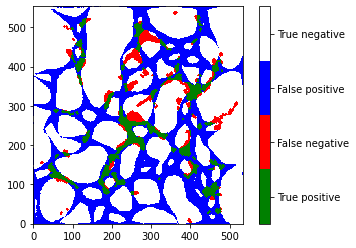

In [44]:
im_shape = np.shape(np.load("data/for_learning/CI04.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

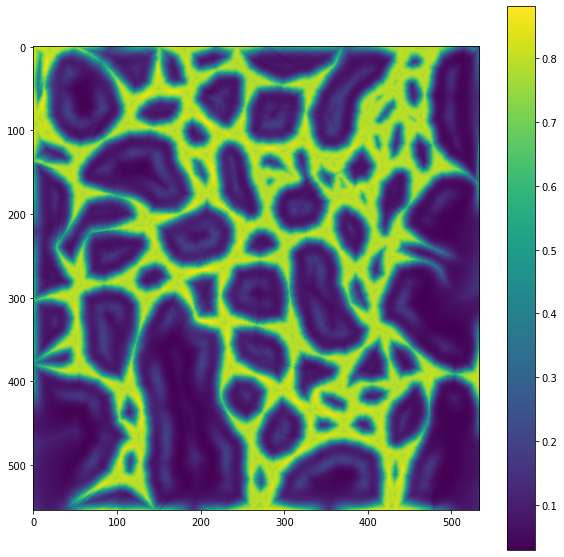

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(y_pred_prob.T[1].reshape(im_shape[0], im_shape[1]))
plt.colorbar()

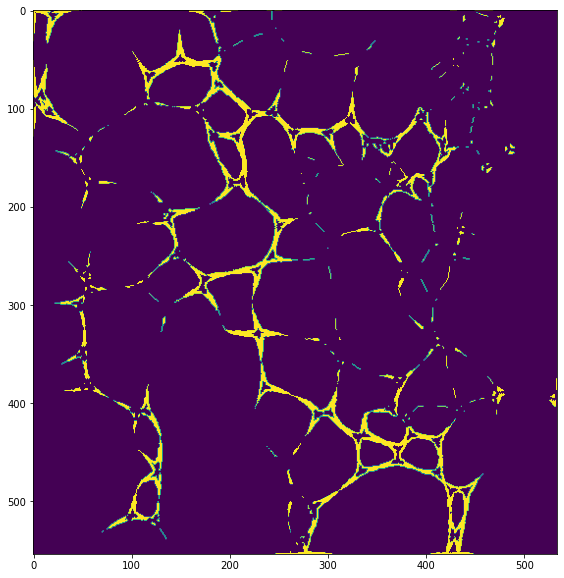

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(np.array(y_pred_prob.T[1]>0.80).reshape(im_shape[0], im_shape[1]))

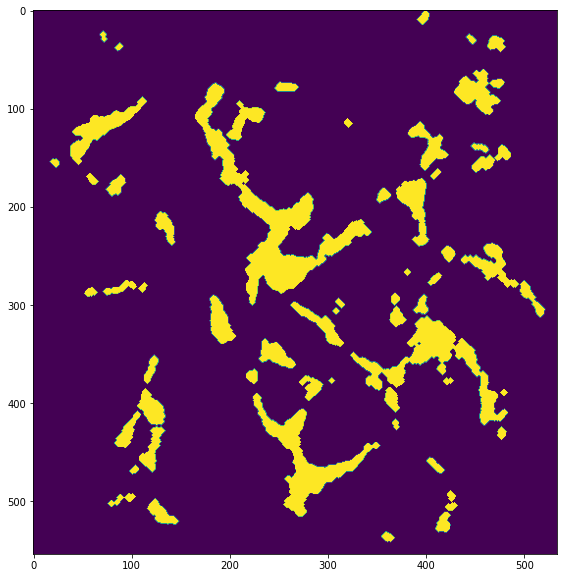

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(np.array(y_val).reshape(im_shape[0], im_shape[1]))